# Rewards function for solving the product delivery problem with reinforcement learning techniques

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
#########
#Example of values

b = 0.2
c = 0.61
e = 0.9

p0 = 0.7

M = 10**2
P1 = -10**2
P2 = -10**3

######


a = b/10
f = 1-(1-e)/10
d = p0*e+(1-p0)*c



def str_line1(x):
    m = 1
    n = -c
    return((m*x+n)/(c-b))

def str_line2(x):
    m = 1
    n = -c
    return(M*(m*x+n)/(d-c))

def str_line3(x):
    m = 1
    n = -e
    return(M*(m*x+n)/(d-e))

def exp1(x):
    A = -P1*(P2/P1)**(1/(1-b/a))
    l1 = (1/a-1/b)**(-1) * np.log(P2/P1)
    return(-A*np.exp(l1/x))

def exp2(x):
    B = -P1*(P2/P1)**( 1/(1-(1-e)/(1-f)) )
    l2= (1/(1-f)-1/(1-e))**(-1) * np.log(P2/P1)
    return(-B * np.exp(l2/(1-x)) ) 

    

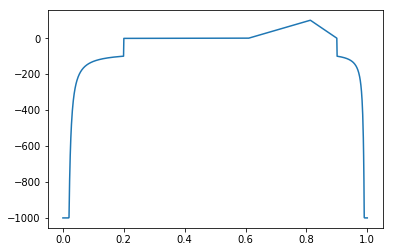

In [5]:
x = np.linspace(0,1, 1000)
conditions = [(x>=0) & (x < a),
              (x>=a) & (x<b),
              (x>=b) & (x<c),
              (x>=c) & (x<d),
              (x>=d) & (x<e),
              (x>=e) & (x<f),
              (x>f) & (x<=1)]

functions = [P2,
             lambda x: exp1(x),
             lambda x: str_line1(x),
             lambda x: str_line2(x),
             lambda x: str_line3(x),
             lambda x: exp2(x),
             P2]
R = np.piecewise(x,conditions , functions)
plt.plot(x,R)